In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#data processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
#Model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
#Converting the dataset from text to csv
### import csv
### read_file = pd.read_csv(r'\My_ML_Notebooks\SMSSpamCollection.txt', sep=' ')
### read_file.to_csv(r'\My_ML_Notebooks\SMSSpamCollection.csv', index=None)

### Importing the Dataset
data = pd.read_csv("SMSSpamCollection.csv", encoding='latin1')
data.sample(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ï»¿Column1,Column2
542,ham,A famous quote : when you develop the ability ...
2499,ham,"I know where the &lt;#&gt; is, I'll be there..."
1974,ham,I had askd u a question some hours before. Its...
4669,ham,IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO
2614,ham,Thanks for sending this mental ability question..


In [30]:
#Initial Exploration and Data Cleaning
data.shape
data.rename(columns={'ï»¿Column1': 'result', 'Column2': 'emails'}, inplace=True)
data
data.isnull().sum()
data.duplicated().sum()
data = data.drop_duplicates(keep='first')
data.shape
data.head(5)


,result,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


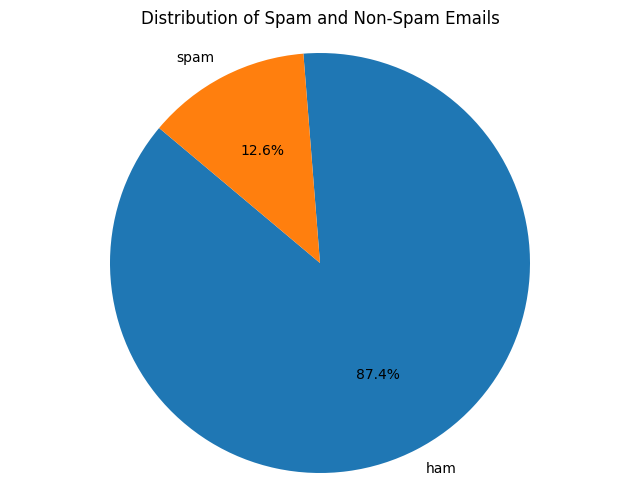

In [40]:
### EDA
### 1. Distribution of labels
### import nltk
data['result'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()
